혼자 공부하는 머신러닝+딥러닝 2, 3장

# 2장. 데이터 다루기

## 2-1. 훈련 세트와 테스트 세트
- 테스트 세트: 평가에 사용하는 데이터
- 훈련 세트: 훈련에 사용되는 데이터

In [312]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [313]:
# 두 파이썬 리스트 순회하면서 길이와 무게를 하나의 리스트로 담은 2차원 리스트로 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [314]:
# 클래스를 임포트하고 모델 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [315]:
# 0~34까지 훈련 세트, 35~48까지 테스트 세트
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [316]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

위의 0.0은 당연한 결과 = 샘플링 편향!!
- 인덱스 35에서 끊었기 때문에 빙어가 훈련 세트에 하나도 안 들어가게 됨. (도미 35개, 빙어 14개)

In [317]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [318]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [319]:
print(input_arr.shape)

(49, 2)


In [320]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [321]:
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [322]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [323]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [324]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

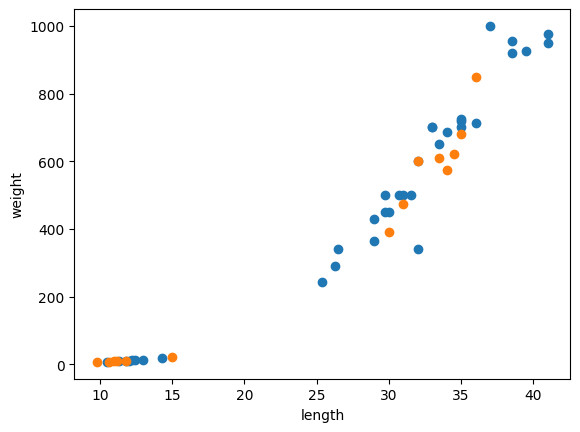

In [325]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색=훈련 세트, 주황색=테스트 세트

In [326]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [327]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [328]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 2-2. 데이터 전처리

In [329]:
# 두 리스트 열 기준 연결
fish_data = np.column_stack((fish_length, fish_weight))

In [330]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [331]:
# 타깃 데이터 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [332]:
# 사이킷런으로 훈련, 테스트 세트 나누기 (앞에서는 직접 인덱스 섞어서 나눔)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [333]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [334]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [335]:
# 도미와 빙어 잘 섞였는지 확인
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [336]:
# 위에서 13개의 테스트 중 10개가 도미, 3개가 빙어라서 좀 더 고루 섞이도록!
# stratify 매개변수에 타깃 데이터 전달하면 클래스 비율게 맞게 데이터 나눔!
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [337]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [338]:
# k-최근접 이웃을 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [339]:
# 우린 사이즈만 보고 도미라고 예측하지만 결과는 빙어
print(kn.predict([[25, 150]]))

[0.]


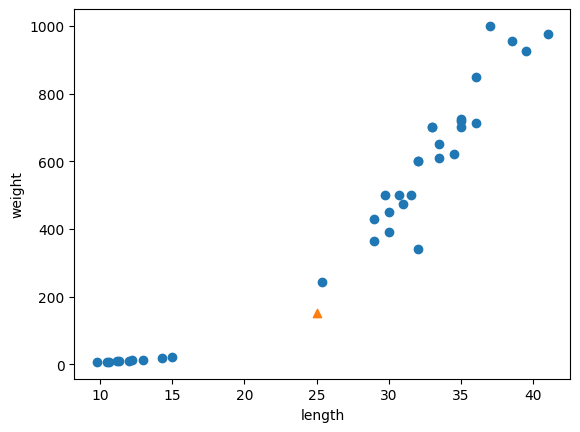

In [340]:
# 산점도록 파악해보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그림만 보면 도미에 가까이 있는 것처럼 보이지만
- KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 kneighbors() 메서드를 제공.
- n_neighbors의 기본 값은 5이므로 5개의 이웃 반환됨.

In [341]:
distances, indexes = kn.kneighbors([[25, 150]])

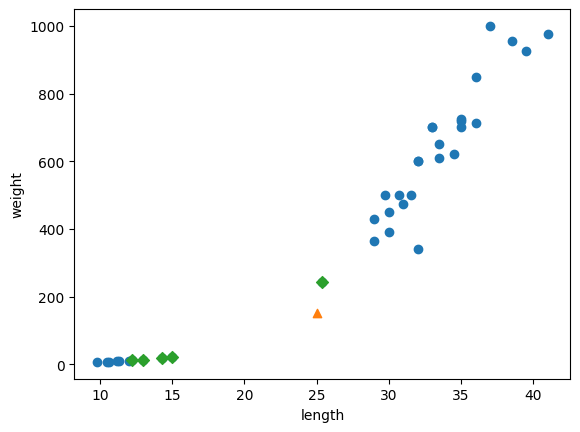

In [342]:
# 훈련 데이터 중에서 이웃 샘플 구분해서 표시
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # 마름모 모양
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

 가장 가까운 이웃에 도미가 하나만 포함되어서 빙어라고 판단한 것!

In [343]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [344]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [345]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


그림으로만 보면 위쪽(도미)에 더 가까이 보이지만, x축은 범위가 좁고 y축은 범위가 넓은 것을 감안해야함!

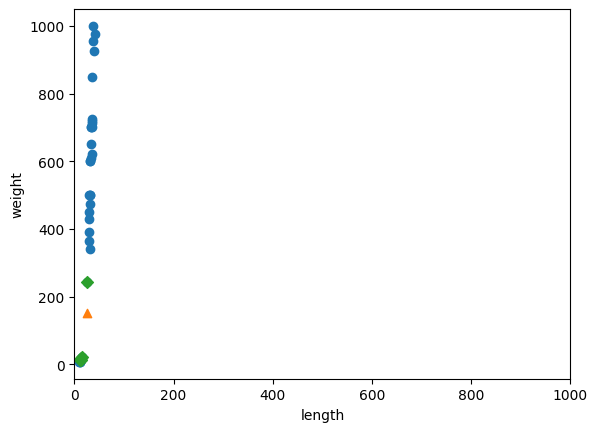

In [346]:
# x축의 범위도 동일하게 0~1000으로 맞춤
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도가 거의 일직선으로 나타남! 이런 데이터라면 x축(길이)는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못함!
- 오로지 y축(무게)만 고려 대상이 됨.
- 알고리즘이 거리 기반일 때 특히 그럼. (k-최근접 이웃도 포함)
- 샘플 간의 거리에 영향을 많이 받아서 특성값을 일정한 기준으로 맞춰 주어야함.=데이터 전처리

In [347]:
# 전처리 방법 -> 표준점수
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [348]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [349]:
# 표준 점수로 변환 (원본-평균  ... % 표준편차)
train_scaled = (train_input - mean) / std

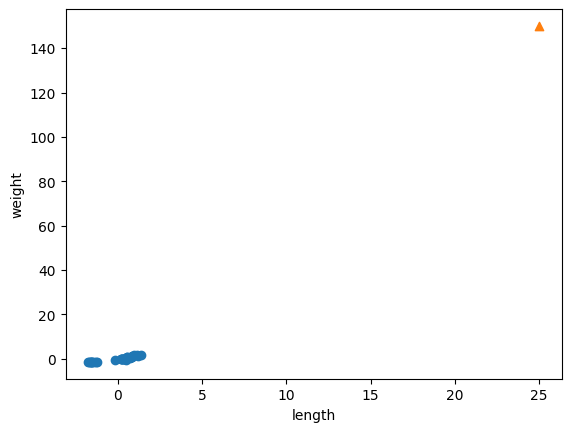

In [350]:
# 전처리 데이터로 모델 훈련
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플 하나만 오른쪽 위에 위치.
- 당연한 것 -> 훈련 세트를 mean으로 빼고 std로 나누어 주어서 값의 범위가 크게 달라짐. 샘플[20, 150]을 동일한 비율로 변환하지 않으면 이런 현상이 발생.

- 중요한 점!! -> 훈련 세트의 mean, std를 이용해서 변환해야 한다는 점.
- 샘플 하나만으로는 평균, 표준편차를 구할 수가 없음.

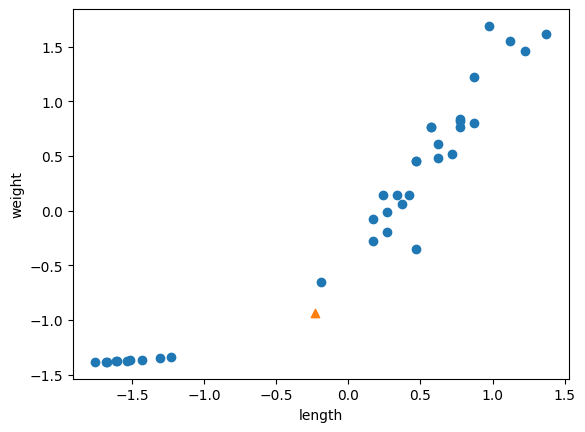

In [351]:
new = (25, 150)
new = (np.array(new) - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 그래프는 앞서 표준편차로 변환하기 전의 산점도와 거의 동일, 크게 달라진 점은 x축과 y축의 범우기ㅏ -1.5~1.5사이로 바뀌었다는 것.
- 훈련 데이터의 두 특성이 비슷한 범위를 차지한다는 것

In [352]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [353]:
# 마찬가지로 테스트 세트도 훈련 세트의 평균, 표준편차로 변환
test_scaled = (test_input - mean) / std

In [354]:
kn.score(test_scaled, test_target)

1.0

In [355]:
print(kn.predict([new]))

[1.]


샘플을 도미로 예측함.
- 특성을 표준점수로 바꿔서 k-최근접 이웃 알고리즘이 올바르게 거리를 측정함! 이로 인해 가장 가까운 이웃에 변화가 생겼을 것으로 예측.

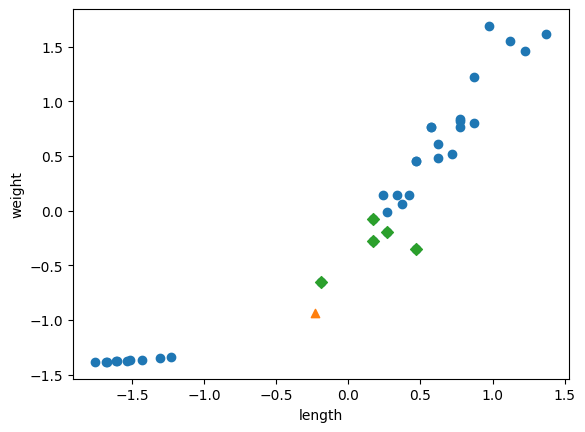

In [356]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 산점도에서 샘플과 가장 가까운 샘플 5개들은 모두 도미!

# 3장. 회귀 알고리즘과 모델 규제

## 3-1. k-최근접 이웃 회귀
- 농어 무게를 잘못 측정해서 무게 말고 다른 정상 데이터들로 무게를 예측해야함.

In [357]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

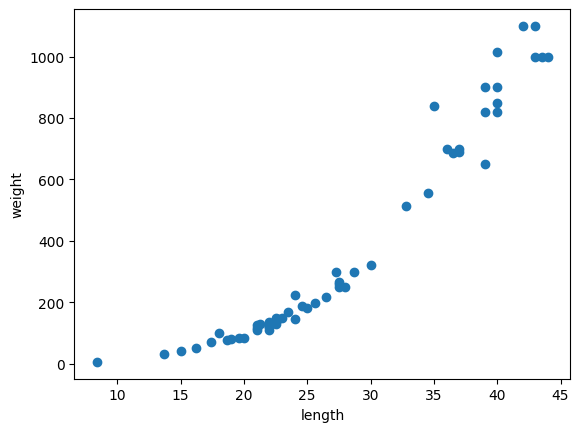

In [358]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [361]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [362]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [363]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [364]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [365]:
print(train_input) # 2차원 배열이 됨. [[ , , ]]

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


### 결정 계수 (R^2)

- 1 - (타깃과 예측값의 차이를 제곱하여 더한 값 % 타깃과 평균의 차이를 제곱하여 더한 값)

In [366]:
from sklearn.neighbors import KNeighborsRegressor

In [367]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [368]:
knr.score(test_input, test_target)  # 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율

0.992809406101064

In [369]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했지만, 훈련 세트를 사용해 평가해보면?
- 즉, score() 메서드에 훈련 세트를 전달하여 점수를 출력해봄.

### 과대적합 vs 과소적합

In [370]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 모델을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어짐. 따라서, 훈련 세트의 점수가 조금 더 높게 나오는 것이 맞아야하는데...
- 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 = 훈련 세트에 과대적합
- 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우는 = 모델이 훈련 세트에 과소적합(모델이 단순하여 훈련 세트에 적절히 훈련되지 않은 경우)

In [371]:
# 위에서 과소적합이었어서 복잡하게 만드려고 함.
# 이웃의 갯수를 3으로 설정합니다 (개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해짐.=복잡)
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) # 훈련 세트 점수 높아짐 ok

0.9804899950518966


In [372]:
print(knr.score(test_input, test_target)) # 테스트 세트의 점수가 낮아졌으므로 과소적합 해결!

0.9746459963987609


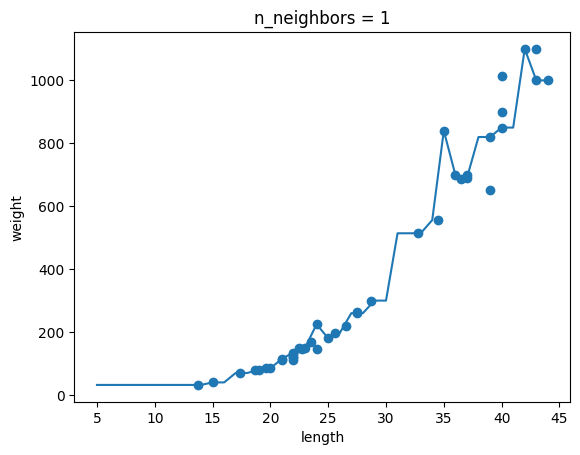

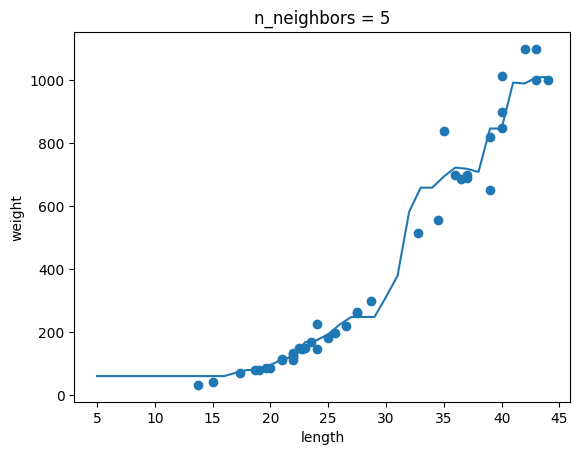

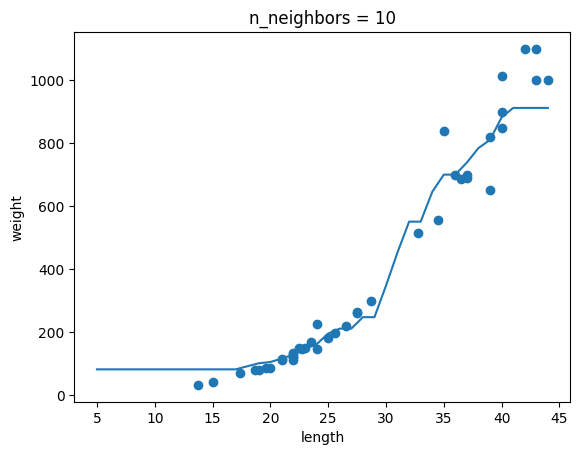

In [373]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 3-2. 선형 회귀

- k-최근접 이웃의 한계
- 50cm인 농어의 실제 무게와 예측한 무게가 너무 다름 (범위 밖에 있는 길이)

In [374]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [375]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [376]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [377]:
print(knr.predict([[50]])) # 50cm 농어를 1.03키로라고 예측하지만, 실제론 1.5키로

[1033.33333333]


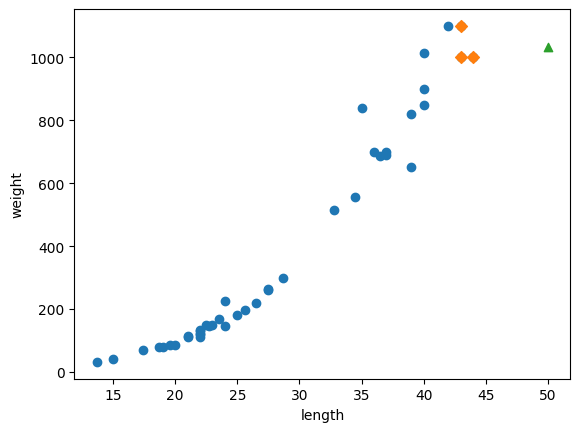

In [378]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [379]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [380]:
print(knr.predict([[100]])) # 길이가 100인 농어도 똑같이 1.03키로로 예측(잘못됨)

[1033.33333333]


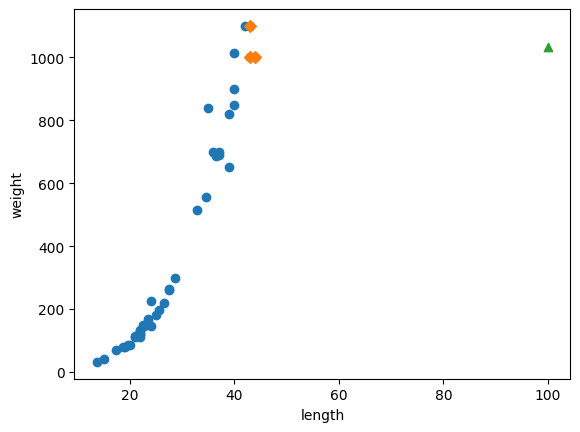

In [381]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형회귀

In [382]:
from sklearn.linear_model import LinearRegression

In [383]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [384]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [385]:
# 선형회귀 = ax+b에서 a와 b를 각각 계산
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


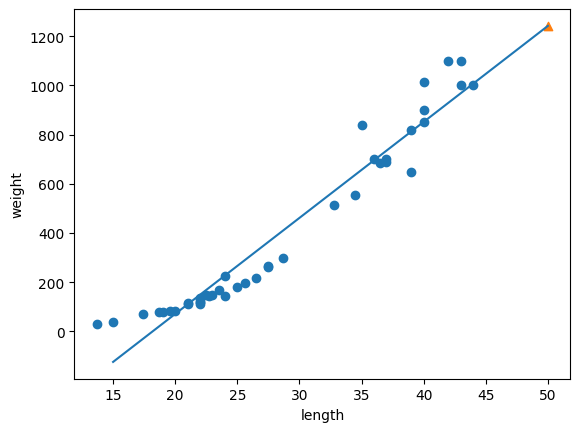

In [386]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [387]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 위 산점도에서 오른쪽 위는 잘 맞지만, 왼쪽 아래로 갈수록 무게가 음수가 된다는 것은 말이 안됨.
- 훈련 세트 점수도 높은 편은 아님 = 과소적합
> 다항 회귀(곡선 모양)으로 바꿔야함.

다항 회귀

In [388]:
# 훈련 세트, 테스트 세트의 input을 제곱함!! (타깃값은 그대로.. 제곱할 필요 x)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [389]:
# 제곱한 것을 앞에 추가한 것으로 총 2열이 됨
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [390]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [391]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


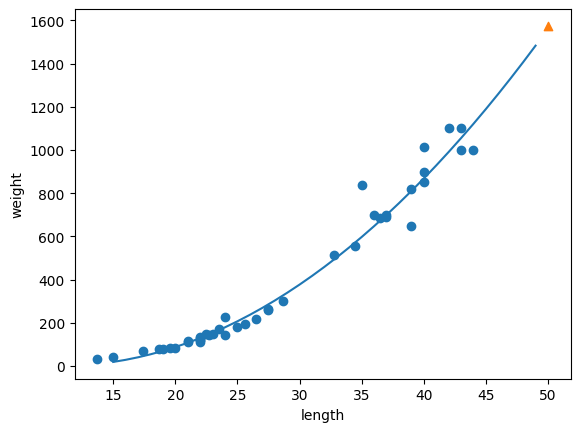

In [392]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [393]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


- 훈련 세트의 경향을 잘 따르고, 무게가 음수로 나올 일도 없음(곡선형!)
- 훈련 세트와 테스트 세트에 대한 점수도 크게 높아짐

## 3-3. 특성 공학과 규제
- 농어(perch)의 무게를 예측하려고 몸통 길이와 길이를 제곱해서 선형 회귀 훈련 시켰지만 여전히 과소적합 ...
- 다른 데이터인 높이와 두께도 함께 사이킷런의 PolynomialFeatures라는 다항회귀에 적용하면 됨!

다중 회귀
### 특성 공학
- 농어 길이 x 농어 높이 등의 새로운 특성을 뽑아내는 작업

In [394]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full) # length, height, width

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [395]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [396]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런의 변환기
- fit() 메서드는 새롭게 만들 특성 조합을 찾음
ex) [1, 2, 3]으로 [1, 2, ,3 ,4, 6, 9] 특성 만듦, 1은 항상 추가되는데 특성과 곱해지는 계수라서. include_bias=False라고 하면 됨!
-transform() 메서드는 실제로 데이터를 변환함.

In [397]:
from sklearn.preprocessing import PolynomialFeatures

In [398]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [399]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [400]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [401]:
print(train_poly.shape)

(42, 9)


In [402]:
# 어떻게 특성 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [403]:
# 훈련 세트에 적용했던 변환기로 테스트 세트를 변환!!!!
test_poly = poly.transform(test_input)

다중 회귀 모델 훈련하기

In [404]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [405]:
print(lr.score(test_poly, test_target))

0.9714559911594111


훈련 세트에 대해서 높은 점수 나오고, 테스트 대한 점수도 길이만 사용했을 때의 과소적합 문제 사라짐!
- 특성을 더 많이 추가하면? 5제곱까지!

In [406]:
# 5제곱
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [407]:
print(train_poly.shape)

(42, 55)


In [408]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [409]:
print(lr.score(test_poly, test_target))

-144.40579436844948


특성의 개수를 늘리면 선형 모델은 아주 강력해짐. 훈련 세트에 대해 거의 완벽하지만, 테스트 세트에서는 별로. (과대적합)

### 규제
-머신러닝이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 = 과대적합 x = 특성에 곱해지는 계수 즉, 기울기를 작게 만드는 것


In [410]:
from sklearn.preprocessing import StandardScaler  # 평균 표준편차 이용

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 1. 릿지
- 계수를 제곱한 값을 기준으로 규제

In [411]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [412]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


- 테스트 세트 점수 돌아옴.
> 규제의 양을 alpha라는 하이퍼파라미터로 조절 가능!
- 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha

In [413]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [414]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

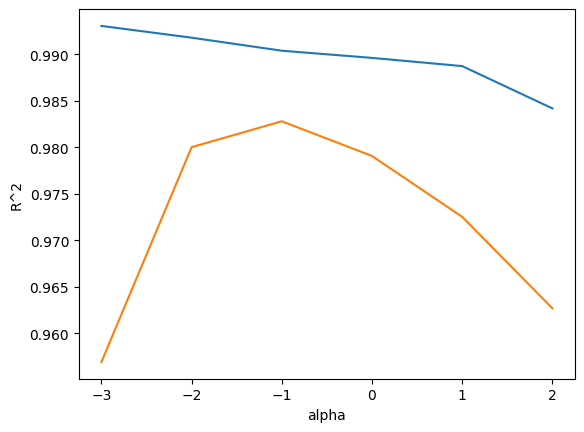

In [415]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [416]:
# 차이가 가장 없는 -1일 때(숫자가 너무 작아서 로그 씌움 즉, 0.1일 때)
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


#### 2. 라쏘
- 계수의 절댓값을 기준으로 규제

In [417]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [418]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [419]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


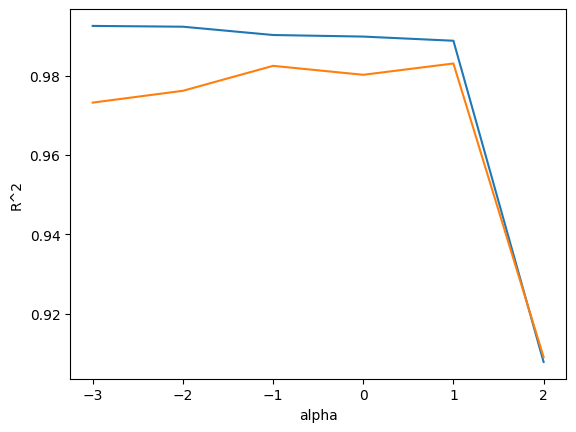

In [420]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [421]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [422]:
print(np.sum(lasso.coef_ == 0))

40


위에 40은 라쏘 모델의 계수인 coef 값이 0인 계수가 40개라는 뜻임. 55개의 특성을 모델에 주입했지만, 유용한 특성을 골라낸다는 장점임.

In [423]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DA_week7.ipynb"